# Pasos iniciales

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib as mpl
import random

In [223]:
entrenamiento = pd.read_csv('/content/drive/My Drive/Orga Datos/tp0 y tp1/Entrenamieto_ECI_2020.csv')
entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [224]:
cmap = cm.get_cmap('viridis')
saltos = np.linspace(0.2, 1, 15)
colores = cmap(saltos)


# Conversion a dolar

In [225]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'JPY', 'Total_Amount'] = entrenamiento['Total_Amount']*0.0096
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'JPY', 'Total_Amount_Currency'] = 'USD'

In [226]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'EUR', 'Total_Amount'] = entrenamiento['Total_Amount']*1.17
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'EUR', 'Total_Amount_Currency'] = 'USD'

In [227]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'AUD', 'Total_Amount'] = entrenamiento['Total_Amount']*0.70
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'AUD', 'Total_Amount_Currency'] = 'USD'

In [228]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'GBP', 'Total_Amount'] = entrenamiento['Total_Amount']*1.29
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'GBP', 'Total_Amount_Currency'] = 'USD'

# Filtrando

In [229]:
entrenamiento.loc[entrenamiento['Region'] == 'Japan', 'Territory'] = 'Japan'
df = entrenamiento[['Territory', 'Total_Amount','Region','Stage']]
df

,Territory,Total_Amount,Region,Stage
0,None,6169176.00,EMEA,Closed Lost
1,None,56429.10,EMEA,Closed Won
2,NW America,83865.60,Americas,Closed Won
3,NW America,7421881.50,Americas,Closed Lost
4,NW America,13357192.50,Americas,Closed Lost
...,...,...,...,...
16942,Austria,120919.50,EMEA,Closed Won
16943,Austria,108827.55,EMEA,Closed Won
16944,Austria,120919.50,EMEA,Closed Won
16945,NE America,2346796.88,Americas,Closed Lost


In [230]:
max_amounts = df.groupby('Territory').agg({'Total_Amount':'sum'})
max_amounts


,Total_Amount
Territory,
Albania,4.517159e+06
Armenia,2.269141e+07
Australia,2.402488e+09
Austria,2.171008e+07
Belarus,2.098295e+07
...,...
UAE (Dubai),1.801713e+08
UAE (Others),7.539721e+05
Ukraine,1.741587e+07


In [231]:
top_max_amounts = max_amounts.nlargest(10, 'Total_Amount')
top_max_amounts_sin_none = max_amounts[ max_amounts.index != 'None' ].nlargest(10, 'Total_Amount')
print(top_max_amounts)
top_max_amounts_sin_none

            Total_Amount
Territory               
Australia   2.402488e+09
NW America  2.161057e+09
SE America  2.057781e+09
None        1.713834e+09
NE America  1.637583e+09
Germany     1.393468e+09
India       7.895088e+08
France      4.963776e+08
SW America  4.852769e+08
Japan       4.042894e+08


,Total_Amount
Territory,
Australia,2.402488e+09
NW America,2.161057e+09
SE America,2.057781e+09
NE America,1.637583e+09
Germany,1.393468e+09
India,7.895088e+08
France,4.963776e+08
SW America,4.852769e+08
Japan,4.042894e+08


# Graficando

## Con No_especificado

In [232]:
top_max_amounts = top_max_amounts.reset_index()
top_max_amounts = top_max_amounts.replace(to_replace='None', value='No_especificado')
top_max_amounts

,Territory,Total_Amount
0,Australia,2.402488e+09
1,NW America,2.161057e+09
2,SE America,2.057781e+09
3,No_especificado,1.713834e+09
4,NE America,1.637583e+09
5,Germany,1.393468e+09
6,India,7.895088e+08
7,France,4.963776e+08
8,SW America,4.852769e+08
9,Japan,4.042894e+08


Text(0, 0.5, 'Territorios')

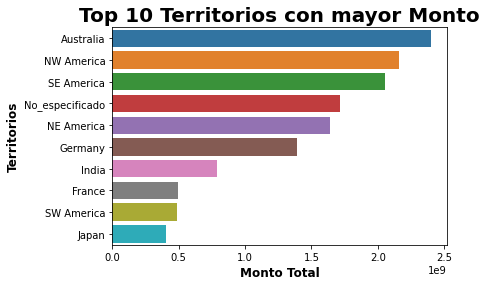

In [233]:
g = sns.barplot(x=top_max_amounts['Total_Amount'], y=top_max_amounts['Territory'], orient='h')
g.set_title("Top 10 Territorios con mayor Monto", fontsize=20, fontweight='bold')
g.set_xlabel("Monto Total", fontsize=12, fontweight='bold')
g.set_ylabel("Territorios", fontsize=12, fontweight='bold')

In [234]:
top_max_amounts = top_max_amounts.set_index('Territory')
top_max_amounts

,Total_Amount
Territory,
Australia,2.402488e+09
NW America,2.161057e+09
SE America,2.057781e+09
No_especificado,1.713834e+09
NE America,1.637583e+09
Germany,1.393468e+09
India,7.895088e+08
France,4.963776e+08
SW America,4.852769e+08


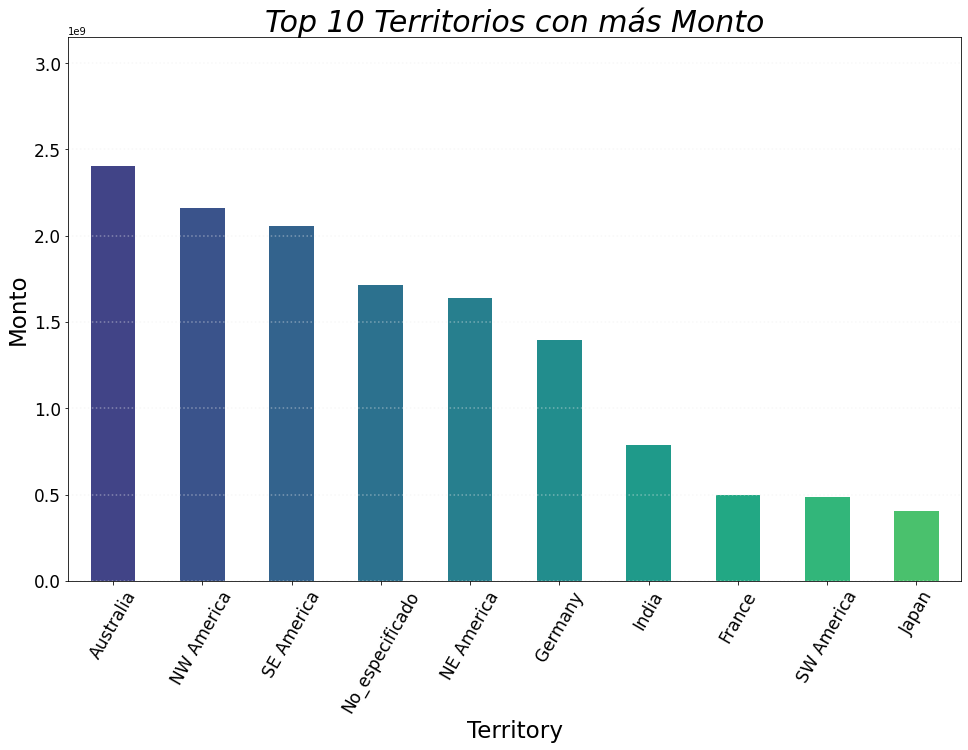

In [235]:

grafico = top_max_amounts['Total_Amount'].plot(kind='bar',figsize=(16,10), color=colores, rot=60, fontsize=17)
plt.title('Top 10 Territorios con más Monto', fontsize=30, fontstyle='oblique')
ax = plt.gca()
ax.set_ylabel('Monto',fontsize=23)
ax.set_xlabel('Territory', fontsize=23)

lineas = grafico.get_yticks()
for i in lineas:
      grafico.axhline(y=i, linestyle=':', alpha=0.4, color='#eeeeee')

## Sin No_especificado

Text(0, 0.5, 'Territorios')

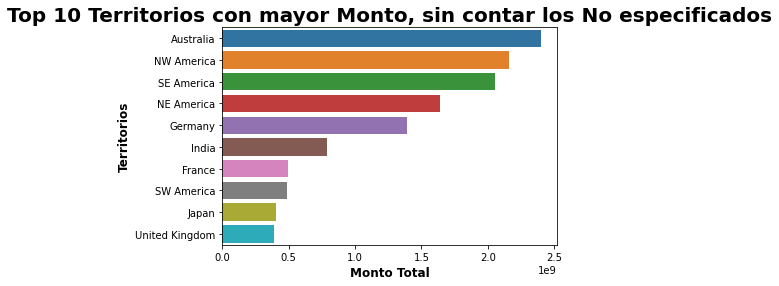

In [236]:
top_max_amounts_sin_none = top_max_amounts_sin_none.reset_index()
g = sns.barplot(x=top_max_amounts_sin_none['Total_Amount'], y=top_max_amounts_sin_none['Territory'], orient='h')
g.set_title("Top 10 Territorios con mayor Monto, sin contar los No especificados", fontsize=20, fontweight='bold')
g.set_xlabel("Monto Total", fontsize=12, fontweight='bold')
g.set_ylabel("Territorios", fontsize=12, fontweight='bold')

In [237]:
top_max_amounts_sin_none = top_max_amounts_sin_none.set_index('Territory')
top_max_amounts_sin_none

,Total_Amount
Territory,
Australia,2.402488e+09
NW America,2.161057e+09
SE America,2.057781e+09
NE America,1.637583e+09
Germany,1.393468e+09
India,7.895088e+08
France,4.963776e+08
SW America,4.852769e+08
Japan,4.042894e+08


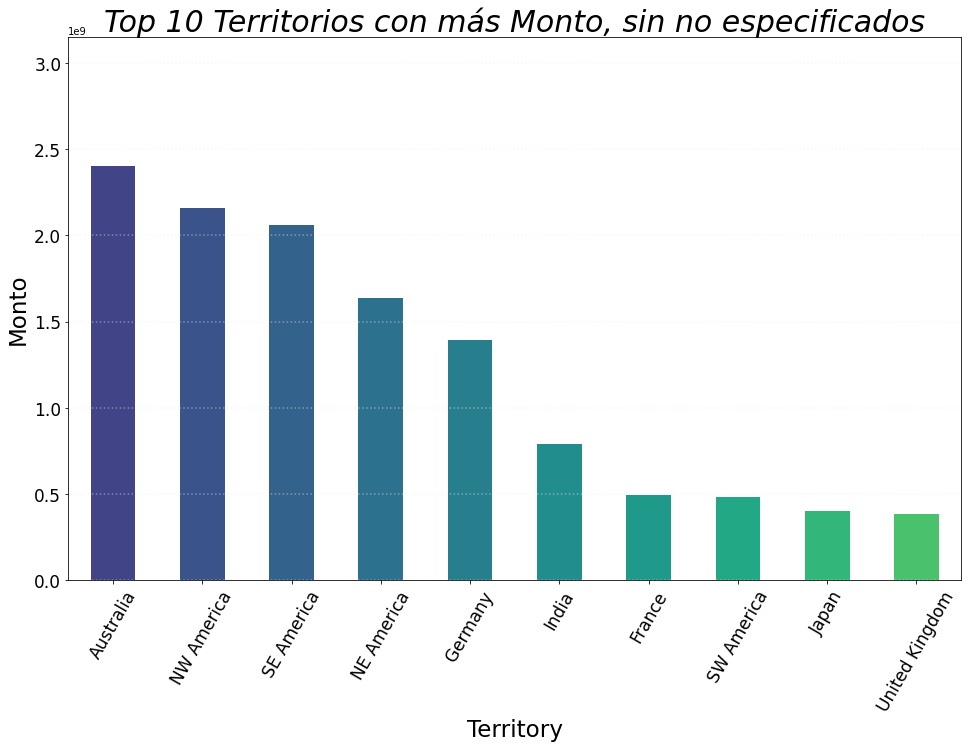

In [238]:

grafico = top_max_amounts_sin_none['Total_Amount'].plot(kind='bar',figsize=(16,10), color=colores, rot=60, fontsize=17)
plt.title('Top 10 Territorios con más Monto, sin no especificados', fontsize=30, fontstyle='oblique')
ax = plt.gca()
ax.set_ylabel('Monto',fontsize=23)
ax.set_xlabel('Territory', fontsize=23)

lineas = grafico.get_yticks()
for i in lineas:
      grafico.axhline(y=i, linestyle=':', alpha=0.4, color='#eeeeee')

## Considerando solo los que tienen Stage Closed won




In [239]:
solo_won = df[df['Stage']=='Closed Won']
solo_won

,Territory,Total_Amount,Region,Stage
1,None,56429.10,EMEA,Closed Won
2,NW America,83865.60,Americas,Closed Won
7,NW America,50688.00,Americas,Closed Won
23,India,1621851.00,APAC,Closed Won
63,Germany,120919.50,EMEA,Closed Won
...,...,...,...,...
16937,Germany,483678.00,EMEA,Closed Won
16939,Norway,469989.00,EMEA,Closed Won
16942,Austria,120919.50,EMEA,Closed Won
16943,Austria,108827.55,EMEA,Closed Won


In [240]:
max_amounts_solo_won = solo_won.groupby('Territory').agg({'Total_Amount':'sum'})
max_amounts_solo_won.head(5)

,Total_Amount
Territory,
Australia,6.271456e+07
Austria,9.245430e+06
Belgium,1.511945e+07
Bulgaria,1.023750e+05
Cambodia,1.279005e+05


In [241]:
max_amounts_solo_won = max_amounts_solo_won.nlargest(10, 'Total_Amount')
max_amounts_solo_won = max_amounts_solo_won.reset_index()
max_amounts_solo_won = max_amounts_solo_won.replace(to_replace='None', value='No_especificado')
max_amounts_solo_won

,Territory,Total_Amount
0,NW America,4.113689e+08
1,Germany,3.159814e+08
2,Japan,1.217480e+08
3,No_especificado,1.116106e+08
4,SE America,1.064762e+08
5,NE America,9.694398e+07
6,India,8.960563e+07
7,United Kingdom,6.703864e+07
8,Australia,6.271456e+07
9,Netherlands,6.221950e+07


In [242]:
max_amounts_solo_won = max_amounts_solo_won.set_index('Territory')

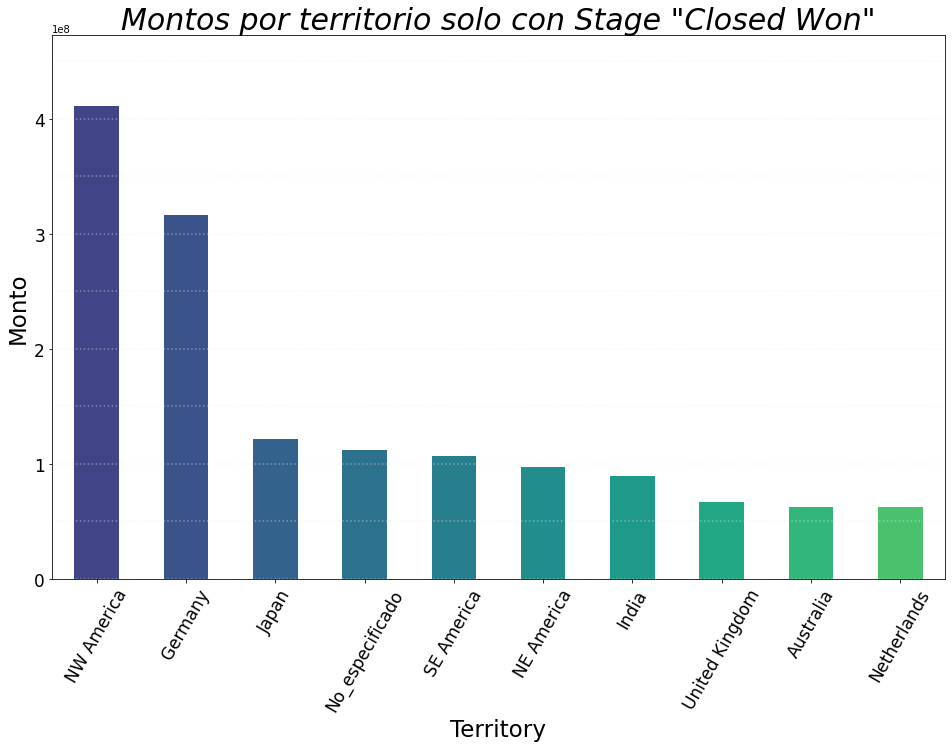

In [243]:
grafico = max_amounts_solo_won['Total_Amount'].plot(kind='bar',figsize=(16,10), color=colores, rot=60, fontsize=17)
plt.title('Montos por territorio solo con Stage "Closed Won"', fontsize=30, fontstyle='oblique')
ax = plt.gca()
ax.set_ylabel('Monto',fontsize=23)
ax.set_xlabel('Territory', fontsize=23)

lineas = grafico.get_yticks()
for i in lineas:
      grafico.axhline(y=i, linestyle=':', alpha=0.4, color='#eeeeee')

## Considerando solo los Closed Lost

In [244]:
solo_lost = df[df['Stage']=='Closed Lost']
solo_lost

,Territory,Total_Amount,Region,Stage
0,None,6169176.00,EMEA,Closed Lost
3,NW America,7421881.50,Americas,Closed Lost
4,NW America,13357192.50,Americas,Closed Lost
5,NW America,14838277.50,Americas,Closed Lost
6,NW America,2659494.60,Americas,Closed Lost
...,...,...,...,...
16938,Germany,1530096.75,EMEA,Closed Lost
16940,NE America,10751580.00,Americas,Closed Lost
16941,NE America,10580920.00,Americas,Closed Lost
16945,NE America,2346796.88,Americas,Closed Lost


In [245]:
max_amounts_solo_lost = solo_lost.groupby('Territory').agg({'Total_Amount':'sum'})
max_amounts_solo_lost.head(5)

,Total_Amount
Territory,
Albania,4.517159e+06
Armenia,2.269141e+07
Australia,2.334842e+09
Austria,1.246465e+07
Belarus,2.098295e+07


In [246]:
max_amounts_solo_lost = max_amounts_solo_lost.nlargest(10, 'Total_Amount')
max_amounts_solo_lost = max_amounts_solo_lost.reset_index()
max_amounts_solo_lost = max_amounts_solo_lost.replace(to_replace='None', value='No_especificado')
max_amounts_solo_lost

,Territory,Total_Amount
0,Australia,2.334842e+09
1,SE America,1.949195e+09
2,NW America,1.749500e+09
3,No_especificado,1.602224e+09
4,NE America,1.540639e+09
5,Germany,1.077487e+09
6,India,6.985663e+08
7,SW America,4.699946e+08
8,France,4.577127e+08
9,United Kingdom,3.192204e+08


In [247]:
max_amounts_solo_lost = max_amounts_solo_lost.set_index('Territory')

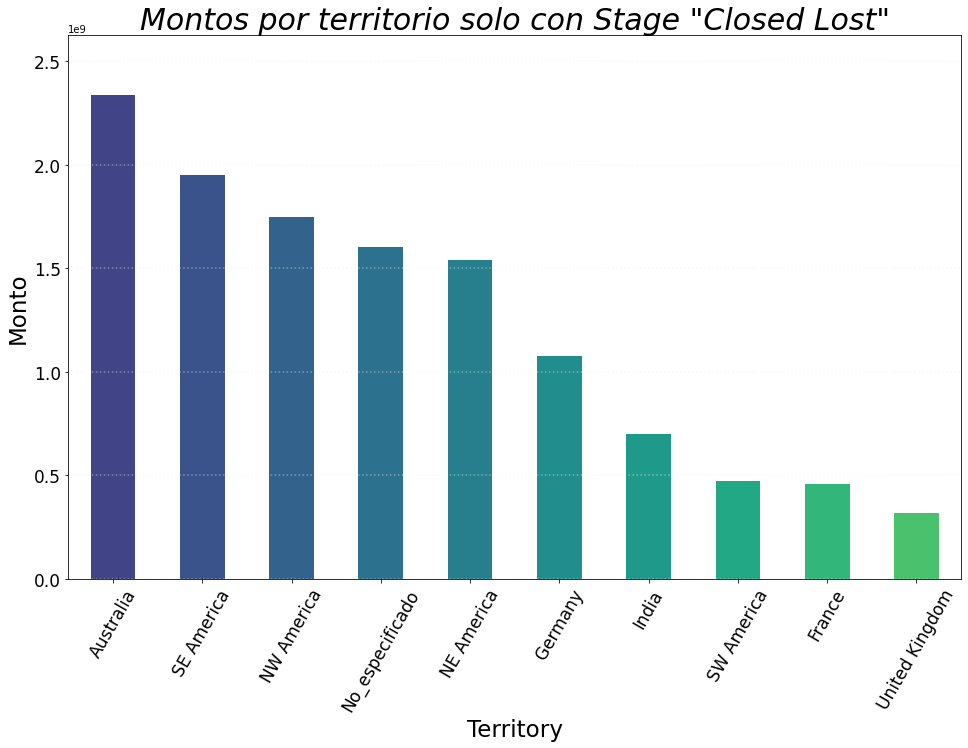

In [248]:
grafico = max_amounts_solo_lost['Total_Amount'].plot(kind='bar',figsize=(16,10), color=colores, rot=60, fontsize=17)
plt.title('Montos por territorio solo con Stage "Closed Lost"', fontsize=30, fontstyle='oblique')
ax = plt.gca()
ax.set_ylabel('Monto',fontsize=23)
ax.set_xlabel('Territory', fontsize=23)

lineas = grafico.get_yticks()
for i in lineas:
      grafico.axhline(y=i, linestyle=':', alpha=0.4, color='#eeeeee')

## Analizando Australia

### Monto

Bueno, vamos a ver que porcentaje del monto pertenece a las etapas de Closed Won y Closed Lost, para este analisis solo vamos a tener en cuenta estas dos, ignoramos las otras etapas, que ademas, hay muy pocas.

In [249]:
australia = max_amounts_solo_won.loc[ ('Australia') ]
australia = australia.to_frame()
australia['Closed Lost'] = max_amounts_solo_lost.loc[ ('Australia') ]
australia.rename( columns = {'Australia':'Closed Won'}, inplace=True )
australia = australia.T
australia

,Total_Amount
Closed Won,6.271456e+07
Closed Lost,2.334842e+09


Text(0.5, 1.0, 'Comparación entre Montos de Closed Won y Closed Lost de Australia')

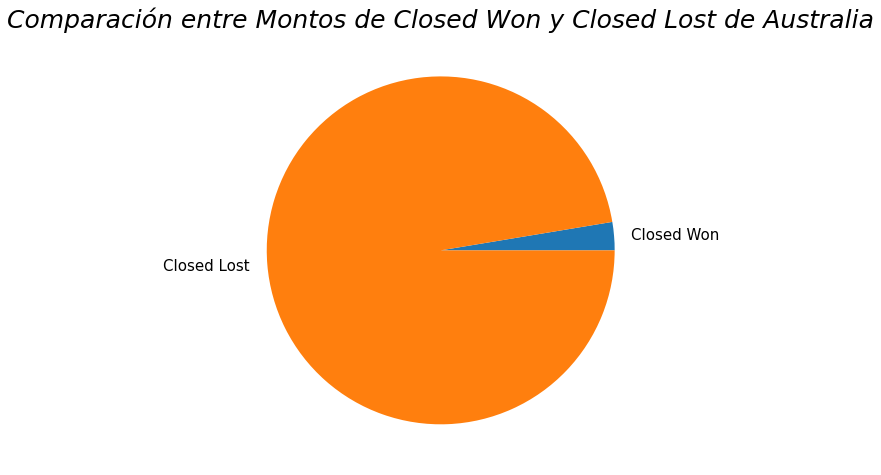

In [250]:
grafico = australia['Total_Amount'].plot.pie( figsize=(10,8), fontsize=15 )
grafico.set_ylabel("")
grafico.set_title('Comparación entre Montos de Closed Won y Closed Lost de Australia',fontsize= 25, fontstyle='oblique' )

A Australia no le fue bien xd


### Oportunidades ganadas

Ahora vamos por la comparacion entre porcentaje ganados y perdidos

In [251]:
australia2 = entrenamiento[ entrenamiento['Territory'] == 'Australia' ]
australia2 = australia2.loc[:, ['Stage']]
australia2

,Stage
615,Closed Won
616,Closed Won
617,Closed Won
618,Closed Won
619,Closed Won
...,...
16193,Closed Lost
16194,Closed Lost
16195,Closed Lost
16196,Closed Lost


In [252]:
australia2 = australia2.groupby('Stage').agg({'Stage':'count'})
australia2 = australia2.loc[ ([ 'Closed Won', 'Closed Lost' ]) ]
australia2

,Stage
Stage,
Closed Won,696
Closed Lost,506


In [253]:
australia2.columns = ['count']
australia2

,count
Stage,
Closed Won,696
Closed Lost,506


Text(0.5, 1.0, 'Comparación entre cantidades de Closed Won y Closed Lost de Australia')

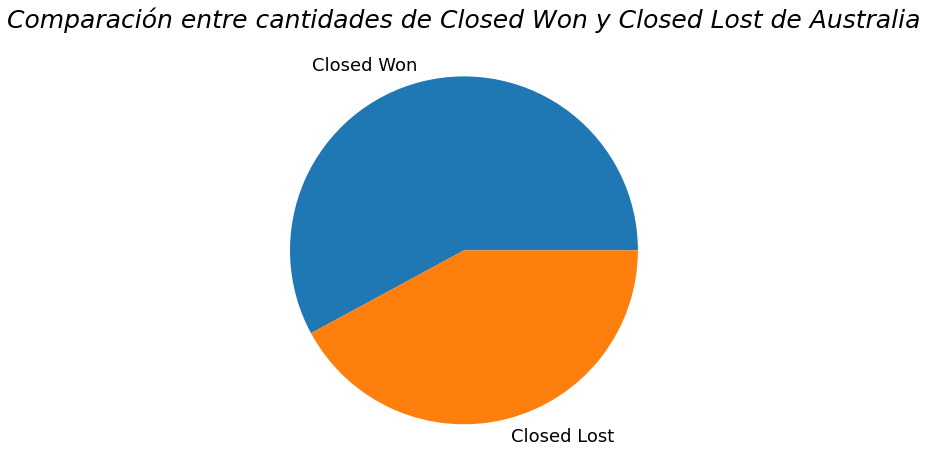

In [254]:
grafico = australia2['count'].plot.pie( figsize=(10,8), fontsize=18 )
grafico.set_ylabel("")
grafico.set_title('Comparación entre cantidades de Closed Won y Closed Lost de Australia',fontsize= 25, fontstyle='oblique' )